In [1]:
# imports

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt

In [2]:
# import load_data function from loadData.py
from loadData import load_data

train_data, train_labels, test_data, test_labels = load_data()


# type of train_data
print("train_data")
print(type(train_data))
print(train_data.shape)

# type of train_labels
print("train_labels")
print(type(train_labels))
print(train_labels.shape)

# type of test_data
print("test_data")
print(type(test_data))
print(test_data.shape)

# type of test_labels
print("test_labels")
print(type(test_labels))
print(test_labels.shape)

Loading data
Data loaded
train_data
<class 'torch.Tensor'>
torch.Size([60000, 784])
train_labels
<class 'torch.Tensor'>
torch.Size([60000])
test_data
<class 'torch.Tensor'>
torch.Size([10000, 784])
test_labels
<class 'torch.Tensor'>
torch.Size([10000])


In [3]:
# Custom dataset class
class CSVDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y


In [4]:
# define the network class

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)


    def forward(self, x):
        x = torch.flatten(x, -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [10]:
# define the training function

def train(model, train_loader, criterion, optimizer, epochs):
    loss_list = []
    for epoch in range(epochs):
        for input, data in enumerate(train_loader):
            input, labels = data
            optimizer.zero_grad()
            output = model(input)
            loss = criterion(output, labels)
            loss_list.append(loss.item())
            loss.backward()
            optimizer.step()
        
        if epoch % 10 == 0:
            print("Epoch: " + str(epoch) + ", Loss: " + str(loss.item()))
    print("Epoch: " + str(epoch) + ", Loss: " + str(loss.item()))

    # use matplotlib to plot the loss
    plt.plot(loss_list)
                
    print("Finished Training")

In [6]:
# define the testing function

def test(model, test_loader):
    correct = 0
    total = 0

    with torch.no_grad():
        for data, labels in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    print(f"Accuracy: {correct / total}")

In [14]:
# data loader
train_dataset = CSVDataset(train_data, train_labels)
test_dataset = CSVDataset(test_data, test_labels)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True)

In [12]:
# create an instance of the network
model = Net()

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# run one forward pass on the first item in the train_loader
print(train_labels[0].item())
model.forward(train_data[0])


5


tensor([-0.1264,  0.0767,  0.0328,  0.0035,  0.0867, -0.0513, -0.0942,  0.0360,
        -0.0678, -0.0979], grad_fn=<AddBackward0>)

Epoch: 0, Loss: 0.05629037693142891
Epoch: 10, Loss: 0.09469635039567947
Epoch: 20, Loss: 0.09676417708396912
Epoch: 30, Loss: 0.09439288824796677
Epoch: 40, Loss: 0.15678365528583527
Epoch: 50, Loss: 0.03727166727185249
Epoch: 60, Loss: 0.0880194753408432
Epoch: 70, Loss: 0.07813089340925217
Epoch: 80, Loss: 0.12281881272792816
Epoch: 90, Loss: 0.07543227076530457
Epoch: 100, Loss: 0.05316409468650818
Epoch: 110, Loss: 0.08243250846862793
Epoch: 120, Loss: 0.05761351063847542
Epoch: 130, Loss: 0.0703040361404419
Epoch: 140, Loss: 0.08171405643224716
Epoch: 150, Loss: 0.04136393219232559
Epoch: 160, Loss: 0.0617557018995285
Epoch: 170, Loss: 0.023144686594605446
Epoch: 180, Loss: 0.036279842257499695
Epoch: 190, Loss: 0.011985897086560726
Epoch: 200, Loss: 0.015489114448428154
Epoch: 210, Loss: 0.07816880941390991
Epoch: 220, Loss: 0.11373360455036163
Epoch: 230, Loss: 0.11999505758285522
Epoch: 240, Loss: 0.008635402657091618
Epoch: 250, Loss: 0.017617253586649895
Epoch: 260, Loss: 0.

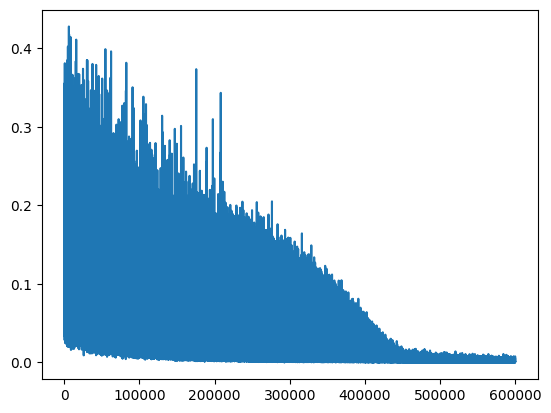

In [18]:
# train the network
train(model, train_loader, criterion, optimizer, 1000)

# test the network
test(model, test_loader)

In [20]:
print(test_labels[0].item())
model.forward(test_data[0])
print(torch.argmax(model.forward(test_data[0])).item())


7
7


In [21]:
# save the model
torch.save(model.state_dict(), "model.pt")

In [22]:
# load the model if needed
model = Net()
model.load_state_dict(torch.load("model.pt"))
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)

{0: -23.29, 1: 13.46, 2: 7.5, 3: 12.23, 4: -19.03, 5: -5.28, 6: -35.03, 7: 31.6, 8: 0.61, 9: 8.0}
7


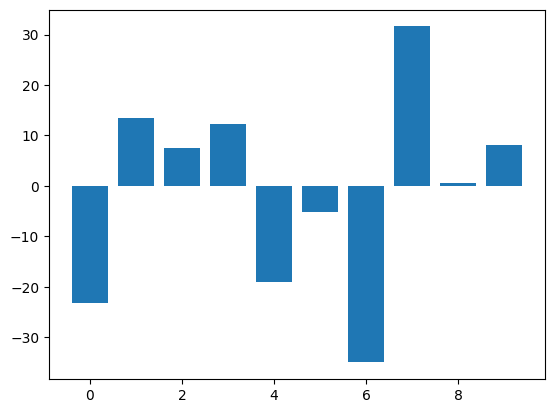

In [23]:
import csv

user_input = []
with open('user_input.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        for i in range(0, len(row)):
            row[i] = float(row[i])/255
        user_input.append(row)

user_input = torch.tensor(user_input)

prediction = model.forward(user_input[0])

# print prediction as dictionary of index: value to 2sf (rounded)
prediction_dict = {}
for i in range(0, len(prediction)):
    prediction_dict[i] = round(prediction[i].item(), 2)
print(prediction_dict)

# bar chart of prediction
plt.bar(range(len(prediction_dict)), list(prediction_dict.values()), align='center')


# print index of max value
print(torch.argmax(prediction).item())
